In [242]:
# Sentiment Analysis on twitter user

In [243]:
#Importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [244]:
#Authentication using API key and API kye secret
authenticate = tweepy.OAuthHandler(API key,API Key Secret)

#Authentication using access token and access token secret
authenticate.set_access_token(access token,access token secret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [245]:
#Extract 200 tweets from the user
posts=api.user_timeline(screen_name="jeffbezos",count=200,lang="en",tweet_mode="extended")

#Print 10 tweets from the user
i=1
for tweet in posts[0:10]:
    print(str(i)+ ')' + tweet.full_text + '\n')
    i=i+1

1)Discussing climate, sustainability, and preserving the natural world with President @EmmanuelMacron today in Paris. #BezosEarthFund #ClimatePledge https://t.co/1WJe18nc3l

2)I just took a DNA test, turns out I’m 100% @lizzo’s biggest fan. #SBLIV https://t.co/RhOduXk8Qd

3)Hey, Alexa — show everyone our upcoming Super Bowl ad. Thanks @TheEllenShow and @PortiaDeRossi! https://t.co/U8Qua3dhwg

4)#Jamal https://t.co/8ej1rUBXVb

5)Hey, India. We’re rolling out our new fleet of electric delivery rickshaws. Fully electric. Zero carbon. #ClimatePledge https://t.co/qFXdZOsY4y

6)Proud of the program we have in India to hire and train deaf associates at our delivery stations. Managers learn basic sign language to be able to communicate. Meeting this group was a moving experience for me. https://t.co/gGm0dvCjkX

7)Amazon partners with thousands of kirana stores all over India as delivery points. It’s good for customers, and it helps the shop owners earn additional income. Got to visit one in Mu

In [246]:
#Create dataframe with Tweets Column
df = pd.DataFrame([tweets.full_text for tweets in posts],columns=['Tweets'])

#Show the top 5 elements in dataframe
df.head()

,Tweets
0,"Discussing climate, sustainability, and preser..."
1,"I just took a DNA test, turns out I’m 100% @li..."
2,"Hey, Alexa — show everyone our upcoming Super ..."
3,#Jamal https://t.co/8ej1rUBXVb
4,"Hey, India. We’re rolling out our new fleet of..."


In [247]:
#Clean text by creating a dunction

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r':','',text)
    text = re.sub(r'RT[\s]+','',text)
    text=re.sub(r'http\S+','',text)
    return text

#Apply cleanText in tweets column
df['Tweets']= df['Tweets'].apply(cleanText)

#Show the dataframe
df

,Tweets
0,"Discussing climate, sustainability, and preser..."
1,"I just took a DNA test, turns out I’m 100% ’s ..."
2,"Hey, Alexa — show everyone our upcoming Super ..."
3,Jamal
4,"Hey, India. We’re rolling out our new fleet of..."
...,...
194,Thanks ! So agree space needs all of us. Grada...
195,And of course – development test flight – anyt...
196,Look for one-chute-out test starting about 7 m...
197,Watching a rocket launch (and rocket landing!)...


In [248]:
#Function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create columns for subjectivity and polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity
0,"Discussing climate, sustainability, and preser...",0.400000,0.100000
1,"I just took a DNA test, turns out I’m 100% ’s ...",0.000000,0.000000
2,"Hey, Alexa — show everyone our upcoming Super ...",0.433333,0.291667
3,Jamal,0.000000,0.000000
4,"Hey, India. We’re rolling out our new fleet of...",0.454545,0.136364
...,...,...,...
194,Thanks ! So agree space needs all of us. Grada...,0.200000,0.250000
195,And of course – development test flight – anyt...,0.000000,0.000000
196,Look for one-chute-out test starting about 7 m...,0.100000,0.000000
197,Watching a rocket launch (and rocket landing!)...,0.266667,0.037500


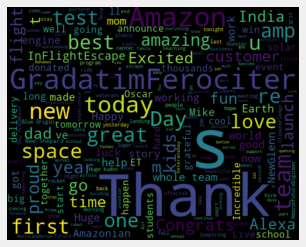

In [249]:
#Plot word cloud

words = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width=500,height=400,random_state=21,max_font_size=119).generate(words)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [250]:
#Function to create positive, neagative or neutral analysis
def analysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'


#Creating a column analysis in dataframe
df['Analysis']=df['Polarity'].apply(analysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Discussing climate, sustainability, and preser...",0.400000,0.100000,Positive
1,"I just took a DNA test, turns out I’m 100% ’s ...",0.000000,0.000000,Neutral
2,"Hey, Alexa — show everyone our upcoming Super ...",0.433333,0.291667,Positive
3,Jamal,0.000000,0.000000,Neutral
4,"Hey, India. We’re rolling out our new fleet of...",0.454545,0.136364,Positive
...,...,...,...,...
194,Thanks ! So agree space needs all of us. Grada...,0.200000,0.250000,Positive
195,And of course – development test flight – anyt...,0.000000,0.000000,Neutral
196,Look for one-chute-out test starting about 7 m...,0.100000,0.000000,Neutral
197,Watching a rocket launch (and rocket landing!)...,0.266667,0.037500,Positive


In [251]:
#Print the positive tweets
j=1
positiveDf=df.sort_values(by=['Polarity'])
for i in range (0,positiveDf.shape[0]):
    if(positiveDf['Analysis'][i]=='Positive'):
        print(str(i)+')'+positiveDf['Tweets'][i])
        print()
        j=j+1

0)Discussing climate, sustainability, and preserving the natural world with President  today in Paris. BezosEarthFund ClimatePledge 

2)Hey, Alexa — show everyone our upcoming Super Bowl ad. Thanks  and ! 

4)Hey, India. We’re rolling out our new fleet of electric delivery rickshaws. Fully electric. Zero carbon. ClimatePledge 

5)Proud of the program we have in India to hire and train deaf associates at our delivery stations. Managers learn basic sign language to be able to communicate. Meeting this group was a moving experience for me. 

6)Amazon partners with thousands of kirana stores all over India as delivery points. It’s good for customers, and it helps the shop owners earn additional income. Got to visit one in Mumbai. Thank you, Amol, for letting me deliver a package. MSME 

7)Lots of fun on stage with  and Zoya Akhtar. 

10)Just landed in India and spent a beautiful afternoon paying my respects to someone who truly changed the world. “Live as if you were to die tomorrow. Learn

In [252]:
#Print the negative tweets
j=1
negativeDf=df.sort_values(by=['Polarity'],ascending=False)
for i in range (0,negativeDf.shape[0]):
    if(negativeDf['Analysis'][i]=='Negative'):
        print(str(i)+')'+negativeDf['Tweets'][i])
        print()
        j=j+1

8)Grabbing a quick selfie with  at India’s small business summit. Everyone squeeze in a little tighter! amazonsmbhav 

21)If you can’t compete with lower prices and better services, then secretly fund phony “grassroots” attack campaigns. Ugly. h…

60)Had the privilege today of unveiling our newest Amazon Air 767 - "Valor" - named in honor of the thousands of Amazonian veterans and military spouses delivering for our customers every day. VeteransDay AmazonWarriors 

63)Very sad to hear of Paul Allen’s passing. His passion for invention and pushing forward inspired so many. He was relentless to the end. My heart goes out to Paul’s family and friends.

81)Highlights from today’s mission. Don’t miss the Nerf ball doing a few backflips in zero gravity. GradatimFerociter  

92)Horrible and truly tragic day for YouTube and Google. We are wishing all our very best for the injured and all those affected.

143)Impossible to express how personally meaningful this is. A dream. Huge kudos to  team 

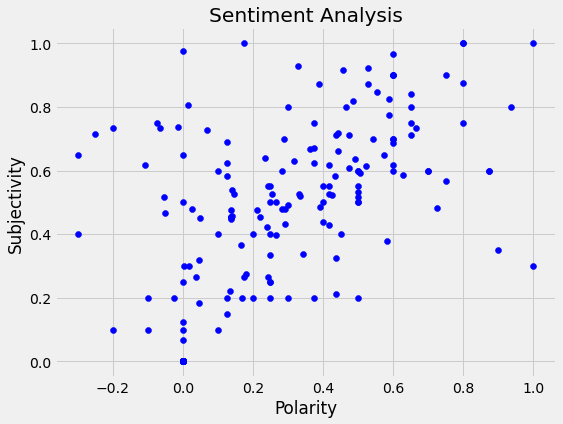

In [253]:
#Ploting the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [254]:
#Get the percentage of positive tweets
positive=df[df.Analysis=='Positive']
positive=positive['Tweets']
round((positive.shape[0]/df.shape[0])*100,1)

69.8

In [255]:
#Get the percentage of negative tweets
negative=df[df.Analysis=='Negative']
negative=negative['Tweets']
round((negative.shape[0]/df.shape[0])*100,1)

7.0

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

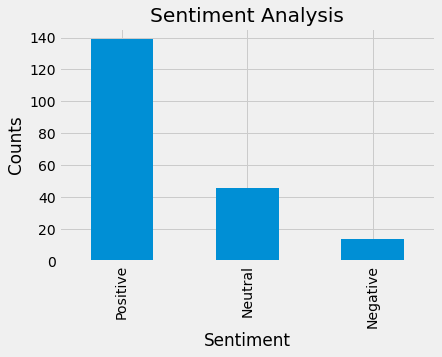

In [256]:
#Value Counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')